# Logistic Regression from Scratch using Titanic Dataset

Logistic Regression is a classification algorithm used to predict the probability of a categorical dependent variable.

Steps:
1. Data Loading & Exploration: Understanding the dataset
2. Preprocessing: Data Cleaning (cleaning missing values, encoding categorical values, & feature scaling)
3. Model Training
4. Evaluation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("All libraries imported successfully.")


All libraries imported successfully.


In [7]:
df = pd.read_csv('./data/titanic_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,False,True
1,1,3,1,26,0,0,7.9250,False,True
2,1,1,1,35,1,0,53.1000,False,True
3,0,3,0,35,0,0,8.0500,False,True
4,0,3,0,29,0,0,8.4583,True,False


In [8]:
# Usually, this step would involve handling missing values, encoding categorical variables, and feature scaling if necessary.
# But, since the dataset is already cleaned, we can proceed to split the data into features and target variable.

In [14]:
# Splitting the data into features and target variable
X = df.drop('Survived', axis=1).values.astype(float)
y = df['Survived'].values

# Splitting the dataset into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print(f"First Row of the Scaled Training Features:\n{X_train[0]}")
print("Shape of Training Features:", X_train.shape)

First Row of the Scaled Training Features:
[ 0.71095168  1.49869053 -1.59146996  1.78035055  2.14017087  1.33569149
 -0.33033836  0.58728391]
Shape of Training Features: (620, 8)


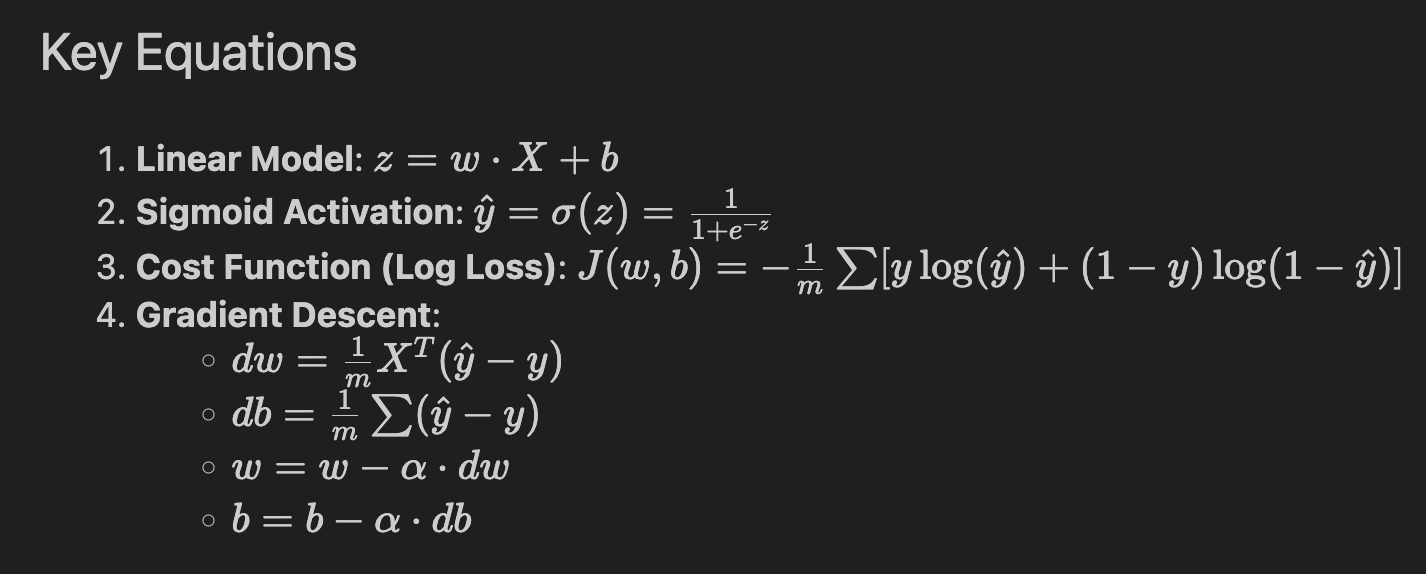

In [33]:
class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        m = len(y_true)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # To avoid log(0)
        loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for epoch in range(self.epochs):
            # forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Track loss
            if epoch % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                self.loss_history.append(loss)
                # print(f"Epoch {epoch}, Loss: {loss}")

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)

In [34]:
# Training the Logistic Regression Model
model = LogisticRegressionModel(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


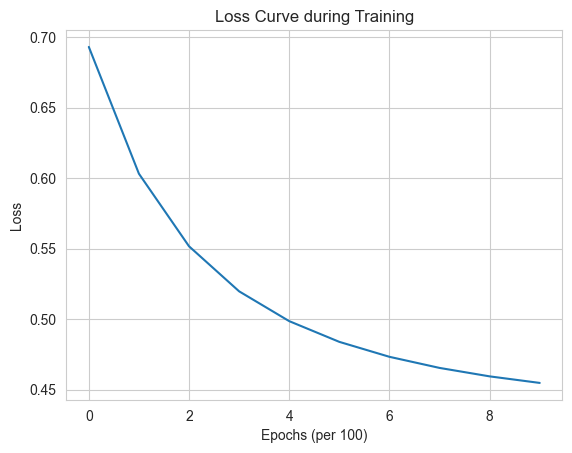

In [35]:
# Plotting the loss curve
plt.plot(model.loss_history)
plt.title("Loss Curve during Training")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Loss")
plt.show()

In [36]:
# Predicting on the test set
y_pred = model.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7548
Precision: 0.7115
Recall: 0.6167
F1 Score: 0.6607


In [37]:
# Implementing the same with sklearn for comparison
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("\nSklearn Logistic Regression Results:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")


Sklearn Logistic Regression Results:
Accuracy: 0.7484
Precision: 0.7143
Recall: 0.5833
F1 Score: 0.6422
